# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
from scipy import random
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as ip


# Question 1

In this question we are asked to find the optimal coverage amount of the agent.
We do this following this approach:
- define the utility function of the agent --> see .py file
- define function to find optimal q*. We wanted to give a self-made optimization a try, thus we use a loop instead of an optimizer approach --> to have a look at it and check it, we left it in the jupyter notebook.
- apply the function over grid of x and calculate optimal q* for each x

best with loop for x = 0.5  is           -1.11111111 at q = 0.50000000
we find that we want to insure 100% of loss as risk averse
now we loop over grid of x to find optimal q for every level of x


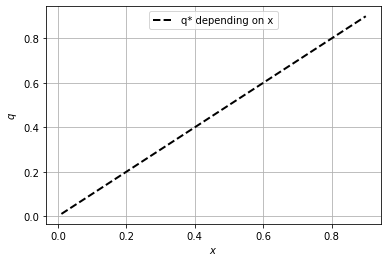

In [2]:
# first try to optimize for given level of x = 0.5
N = 1000

def find_q(x, y=1, p=0.2):
    u_best = -999 # initial maximum
    q_best = np.nan # not-a-number
    q_vec = np.linspace(0.01,x,N)
    u_vec = np.empty(N)
    for i,q in enumerate(q_vec):
            u_now = u_vec[i] = ip.u_ins(q, x=x, y=y, p=p)
            if u_now>u_best:
                q_best=q
                u_best=ip.u_ins(q, x=x, y=y, p=p)
    return(q_best)

q_best = find_q(x=0.5)
u_best=ip.u_ins(q=q_best, x=0.5)

print(f'best with loop for x = 0.5  is           {u_best:.8f} at q = {q_best:.8f}')
print("we find that we want to insure 100% of loss as risk averse")


# now optimize for different levels of x
print("now we loop over grid of x to find optimal q for every level of x")
q_save = np.empty(N)
x = np.linspace(0.01,0.9,N)
for ind, x_i in enumerate(x):
    q_save[ind] = find_q(x=x_i)
  
# plot the findings in a figure
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)
ax.plot(x,q_save,ls='--',lw=2,color='black',label='q* depending on x')
ax.set_xlabel('$x$')
ax.set_ylabel('$q$')
ax.grid(True)
ax.legend(loc='upper center');

*findings* <br>
 we find that the agent always sets q=x. This means that the agent insures the full amoung of the possible loss. We see that the utility function with the parameter v=-2 is a risk-averse utility function.  <br>
 Thus, the agent always insures himself fully with the given price schedule.

# Question 2

Explain your code and procedure

utility value of not being insured:
-1.3
pi that sets consumer indifferent of being/not being insured for q=0.4
0.18105550493427564
utility value of being insured with that pi at q=0.4, should be as close as possible at possible at -1.3
-1.299997932424393
now we analyze multiple levels of q
###testing###
utility level of not being insured:
-1.3
utility level of being insured at some point (to be selected in code)
-1.3
test for all, when everything worked we go on, otherwise an error is printed, so without error everything worked.


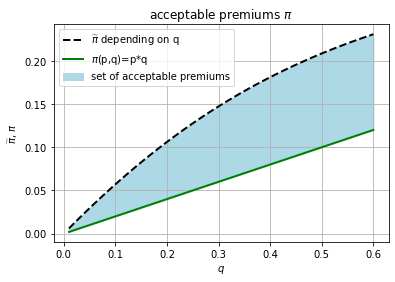

In [3]:
#### We solve with a fixed x=0.6
x=0.6

# print the utility level of uninsured people as a reference
print("utility value of not being insured:")
print(ip.u_unins(x=0.6))

# first solve for fixed q = 0.4 and then later loop over possible values of q
# define objective function: minimize absolute value of insured utility and uninsured utility (should equal 0 --> we minimize)
def choose(pi):
    return np.absolute(ip.u_ins_pi(pi=pi, q=0.4, x=0.6)-ip.u_unins(x=0.6))

# call solver
sol = optimize.minimize_scalar(
    choose,
    method='bounded',
    bounds=(0,0.6)) #we do not allow to pay more than you are insured for maximally

pi = sol.x
print("pi that sets consumer indifferent of being/not being insured for q=0.4")
print(pi)
print("utility value of being insured with that pi at q=0.4, should be as close as possible at possible at -1.3")
print(ip.u_ins_pi(pi=pi, q=0.4, x=0.6))


#### now we analyze the problem for different levels of q
print("now we analyze multiple levels of q")

# now do for all q between 0.01 and 0.6
pi_save = np.empty(100)
ins_acc = np.empty(100)
q_vec = np.linspace(0.01, x, 100)
for i, q in enumerate(q_vec):
    #define what we want to minimize
    def choose(pi):
        return np.absolute(ip.u_ins_pi(pi=pi, q=q)-ip.u_unins(x=0.6))
    #call solver
    sol = optimize.minimize_scalar(
        choose,
        method='bounded',
        bounds=(0,0.6)) #we do not allow to pay more than you maximally are insured for (=max claim)
    pi=sol.x
    pi_save[i]=pi
    ins_acc[i] = 0.2*q

    
# figure 
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
ax.plot(q_vec,pi_save,ls='--',lw=2,color='black',label='$\widetilde{\pi}$ depending on q')
ax.plot(q_vec,ins_acc,ls='-',lw=2,color='green',label='$\pi$(p,q)=p*q')
ax.fill_between(q_vec, ins_acc, pi_save, color="lightblue", label="set of acceptable premiums")
ax.set_xlabel('$q$')
ax.set_ylabel('$ \widetilde{\pi} $, $\pi$')
ax.grid(True)
ax.legend(loc='upper left')
plt.title("acceptable premiums $\pi$")



# testing
print("###testing###")
print("utility level of not being insured:")
print(ip.u_unins(x=0.6))   # print uninsured utility level
test=1   # select which observation of result vectors to check
print("utility level of being insured at some point (to be selected in code)")
print(round(ip.u_ins_pi(q=q_vec[test], pi=pi_save[test]),3))  # must always be around -1.3

print("test for all, when everything worked we go on, otherwise an error is printed, so without error everything worked.")
for  i, pi in enumerate(pi_save):
    try: ip.u_unins(x=0.6)-round(ip.u_ins_pi(q=q_vec[i], pi=pi),1) ==0
    except:
        print("ERROR, CHECK AGAIN")





*findings* <br>
we see the acceptable premiums in the bright blue field in the figure above. It is the room between what the insurance company accepts (>pricing schedule we had before p*q) and what an agent just accepts.

# Question 3

Explain your code and procedure

In [4]:
# set random seed before running the Monte Carlo Funtion defined in the .py file
np.random.seed(123)

ans_1 = ip.v(gamma = 0.9, pi = 0.2)
ans_2 = ip.v(gamma = 0.45, pi = 0.1)
# prints the solution.
print (f"The value calculated by monte carlo integration for gamma = {0.9} and pi = {0.2} is {ans_1}.".format(ans_1))
print (f"The value calculated by monte carlo integration for gamma = {0.45} and pi = {0.1} is {ans_2}.".format(ans_2))

The value calculated by monte carlo integration for gamma = 0.9 and pi = 0.2 is -1.2858562100115751.
The value calculated by monte carlo integration for gamma = 0.45 and pi = 0.1 is -1.2965582462632568.


*findings* <br>
We find that the agent prefers a gamma of 0.9 and a price of 0.2 over a gamma of 0.45 and a price of 0.1 as we have a higher utility level. <br>
This is consistent with what we found in exercise 1, where we find a strong risk-aversion of the agent. He wants to insure as much as possible and is therefore also willing to pay for it.

# Question 4

We Monte-Carlo simulate possible losses x and select the pi that maximizes profits for the insurance company for a given coverage ratio of gamma=0.95. As the company is assumed to be a monopolist, the company will set the agent indifferent to not being insured.

In [5]:
## Monte Carlo simulate having no insurance vs having insurance and find optimal pi
pi_guess = [0]
obj1 = lambda pis: ip.v(gamma=0.95, pi=pis)- ip.v(gamma=0, pi=0)
res1 = optimize.root(obj1,pi_guess,method='broyden1')
pi_optimal = res1.x[0]
print(round(pi_optimal,2))


0.24


*findings* <br>
We find by Monte Carlo simulation that the insurance company will charge premiums of approximately 0.24 for a coverage ratio gamma = 0.95.